# Boosting Techniques

1.

Boosting is an iterative ensemble machine learning technique that converts multiple weak learners (models slightly better than random chance) into a single, high-accuracy strong learner. It works sequentially, with each new model trained to correct the specific errors made by previous models, reducing both bias and variance.

* Sequential Training: Unlike parallel methods (like bagging), boosting trains models one after another. Each new learner is designed to rectify the errors of the preceding one.

* Weighted Data Points (AdaBoost): Misclassified data points from a previous model are assigned higher weights (higher importance), forcing the next model to focus on these hard-to-learn examples.

 * Residual Fitting (Gradient Boosting): Instead of just using weights, Gradient Boosting identifies the difference (residual) between predicted and actual values and trains subsequent models to minimize this error.

2.

AdaBoost and Gradient Boosting both train models sequentially, but differ in how they fix errors: AdaBoost reweights misclassified data points to focus on them in the next iteration, while Gradient Boosting fits new models to the residual errors (gradients) of previous predictions. AdaBoost uses weak learners (often stumps) while Gradient Boosting is more flexible, handling various differentiable loss functions.

* Key Differences in Training:

* AdaBoost (Adaptive Boosting): Increases the weight of misclassified data points after each tree is built, forcing the next learner to focus on hard-to-predict instances.

*Gradient Boosting: Calculates the residual error (\(y-\^{y}\)) and trains the next model to predict these residuals, reducing the loss function (e.g., MSE) directly.



3.  

Regularization in XGBoost acts as a crucial control mechanism that prevents models from becoming too complex and overfitting the training data, enhancing generalization to new data. By adding penalties (\(L1\) and \(L2\)) to leaf weights and using gamma (\(\gamma \)) for tree pruning, XGBoost encourages simpler models, reducing variance.

* Key Ways Regularization Helps XGBoost:

* Prevents Overfitting: Regularization terms (\(L1\) and \(L2\)) penalize extreme leaf weights, ensuring the model doesn't fit noise in the training data.

* Tree Pruning: The regularization parameter \(\lambda \) helps in pruning leaves by making the gain calculation more conservative, allowing for the removal of branches that do not improve the mode.



4.  

* CatBoost is highly efficient at handling categorical data by natively processing text-based categories without requiring extensive manual preprocessing like one-hot encoding. It utilizes innovative "Ordered Target Encoding" to convert categories into numerical values based on target statistics, which minimizes data leakage and overfitting.

* Key reasons for its efficiency include:

* Ordered Target Encoding: Instead of using the entire dataset to compute category statistics, CatBoost sorts data randomly and computes statistics based only on previous samples (the "ordered" approach). This prevents the model from leaking target information into feature encoding.

* Reduced Overfitting: Through Ordered Boosting, the algorithm builds models that are less prone to overfitting compared to traditional Gradient Boosting Decision Trees (GBDT).

* Handling High Cardinality: CatBoost efficiently handles features with many unique values, avoiding the high dimensionality and memory issues associated with one-hot encoding.

5.

* Boosting techniques, such as XGBoost, AdaBoost, and LightGBM, are preferred over bagging methods (like Random Forest) when maximizing predictive accuracy is critical and data is high-dimensional. They are best for applications requiring the reduction of bias in complex, non-linear datasets, including financial fraud detection, medical diagnosis, customer churn prediction, and computer vision tasks.

* Key Applications Where Boosting is Preferred:


* Financial Fraud Detection: Algorithms like Gradient Boosting (GBM) and XGBoost are favored for analyzing massive datasets to detect subtle fraudulent patterns, as they excel at reducing bias in high-stakes, unbalanced data.

* Medical Diagnosis & Risk Prediction: AdaBoost and other boosting approaches are used for disease prediction (e.g., diabetes) due to their high accuracy in interpreting complex, multi-variable patient data.

*Face Detection & Computer Vision: AdaBoost was historically revolutionary for real-time face detection, efficiently building strong classifiers from weak ones.

6.  



In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize the AdaBoost classifier
# Using a shallow decision tree (decision stump) as the base learner
base_estimator = DecisionTreeClassifier(max_depth=1)
model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=0.8,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# 4. Make predictions and evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9649

Classification Report:

              precision    recall  f1-score   support

   malignant       0.94      0.97      0.95        63
      benign       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171



7.



In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# 2. Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize the Gradient Boosting Regressor
# We use standard hyperparameters here; tuning can further improve results.
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 4. Train the model
gbr.fit(X_train, y_train)

# 5. Make predictions
y_pred = gbr.predict(X_test)

# 6. Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score (Accuracy): {r2:.4f}")

# Example of checking feature importance
feature_importance = pd.Series(
    gbr.feature_importances_, index=X.columns
).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Mean Squared Error: 0.2940
R² Score (Accuracy): 0.7756

Feature Importance:
MedInc        0.604259
AveOccup      0.122835
Longitude     0.109853
Latitude      0.098533
HouseAge      0.034113
AveRooms      0.023948
AveBedrms     0.005106
Population    0.001354
dtype: float64


8.



In [3]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Initialize and train the XGBoost Classifier
clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
clf.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9561
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



9.



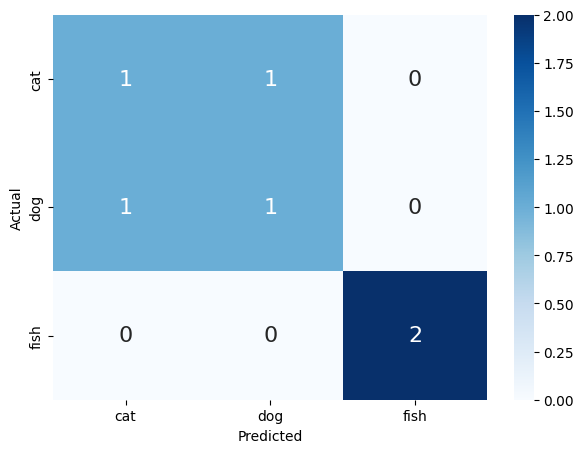

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# 1. Sample data (Actual vs. Predicted)
y_true = ["cat", "dog", "cat", "fish", "fish", "dog"]
y_pred = ["cat", "dog", "dog", "fish", "fish", "cat"]

# 2. Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# 3. Convert to DataFrame for labeling
labels = np.unique(y_true)
df_cm = pd.DataFrame(cm, columns=labels, index=labels)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# 4. Plot using seaborn heatmap
plt.figure(figsize=(7, 5))
# annot=True displays the value in each cell
# fmt='d' formats the values as integers
# cmap="Blues" sets the color scheme
sns.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", annot_kws={"size": 16})
plt.show()


10.

This pipeline outlines a robust approach to predicting loan default using boosting techniques, specifically designed to handle high class imbalance, missing values, and mixed data types (numerical and categorical).

*  Data Preprocessing & Handling Missing/Categorical Values.

* Numerical Features: For columns with low missingness (<5%), use median imputation to avoid bias from outliers (e.g., income). For high missingness, use iterative imputation or create a binary "is_missing" flag before imputing.

* Categorical Features: Replace missing values with the mode (most frequent category) or a new category, such as "Unknown".

* Tree-based Advantage: Algorithms like XGBoost, LightGBM, and CatBoost can natively handle NaN/missing values by learning the best default direction for trees, often reducing the need for extensive imputation.